# Plotting with seaborn

<table>
<tr>
<td><img src="https://i.imgur.com/3cYy56H.png" width="350px"/></td>
<td><img src="https://i.imgur.com/V9jAreo.png" width="350px"/></td>
<td><img src="https://i.imgur.com/5a6dwtm.png" width="350px"/></td>
<td><img src="https://i.imgur.com/ZSsHzrA.png" width="350px"/></td>
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Count (Bar) Plot</td>
<td style="font-weight:bold; font-size:16px;">KDE Plot</td>
<td style="font-weight:bold; font-size:16px;">Joint (Hex) Plot</td>
<td style="font-weight:bold; font-size:16px;">Violin Plot</td>
</tr>
<tr>
<td>sns.countplot()</td>
<td>sns.kdeplot()</td>
<td>sns.jointplot()</td>
<td>sns.violinplot()</td>
</tr>
<tr>
<td>Good for nominal and small ordinal categorical data.</td>
<td>Good for interval data.</td>
<td>Good for interval and some nominal categorical data.</td>
<td>Good for interval data and some nominal categorical data.</td>
</tr>
</table>

----

在前两节中，我们使用“pandas”内置绘图工具探索了数据可视化。 在本节中，我们将对`seaborn`做同样的事情。

`seaborn`是一个独立的数据可视化软件包，可在单个软件包中提供许多极具价值的数据可视化。 它通常是比“熊猫”更强大的工具; 让我们看看为什么。

In [4]:
import pandas as pd
reviews = pd.read_csv("./input/winemag-data_first150k.csv", index_col=0)
import seaborn as sns

## Countplot

`pandas`条形图变成了`seaborn` `countplot`。

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


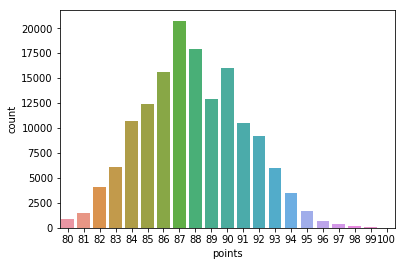

In [5]:
sns.countplot(reviews['points'])

将此图表与两个笔记本前的条形图进行比较，我们发现，与`pandas`不同，`seaborn`不需要我们通过`value_counts`为它设定数据。 `countplot`（真实的名称）为我们聚合数据！

`seaborn`与直线或面积图没有直接的类比。 相反，该包提供了一个`kdeplot`：

## KDE Plot

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


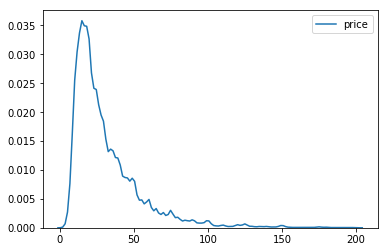

In [6]:
sns.kdeplot(reviews.query('price < 200').price)

KDE是“核密度估计”的缩写，是一种用于平滑数据噪声的统计技术。 它解决了折线图的一个重要的基本弱点：它将抛出异常值或“内部投资者”值，这将导致折线图突然下降。

例如，假设只有一种葡萄酒售价19.93 \ $，但几百种价格20.00 \ $。 如果我们在折线图中绘制值计数，我们的线将突然下降到1，然后再次回到1000左右，创建一个奇怪的“锯齿状”线。 具有相同数据的折线图（如下所示，用于比较）正是这个问题！

注意x xais是`seaborn``kdeplot`是绘制的变量（在这种情况下，`price`），而y轴是它发生的频率。

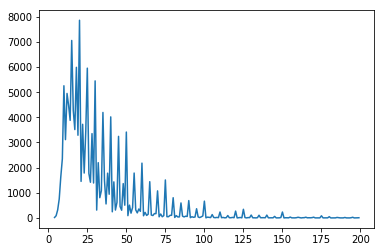

In [7]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

获得区间数据的“真实形状”时，KDE图优于折线图。 事实上，我建议始终使用它代替这种数据的折线图。

然而，对于序数分类数据来说，这是一个更糟糕的选择。 一个KDE图表预计，如果有200个葡萄酒评级85和400评级86，那么它们之间的值，如85.5，应该平滑到两者之间的某个位置（比如300）。 但是，如果中间的值不能发生（不允许85.5的葡萄酒评级），那么KDE图适合不存在的东西。 在这些情况下，请改用折线图。

KDE图也可以用于二维。

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


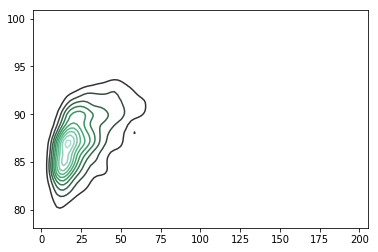

In [8]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

像这样的双变量KDE图是散点图和十六进制图的一个很好的替代方案。 他们解决了相同的数据过度绘图问题，即散点图和十六进制图的地址，在不同但同样具有视觉吸引力。 但请注意，双变量KDE图是计算密集型的。 我们在此示例中采用了5000个点的样本，以使计算时间合理。

## Distplot

相当于`pandas` 直方图的`seaborn`是`distplot`。 这是一个例子：

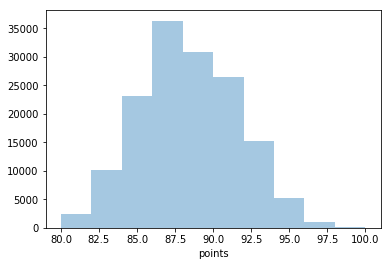

In [9]:
sns.distplot(reviews['points'], bins=10, kde=False)

distplot是复合图类型。 在上面的示例中，我们关闭了默认包含的kde，并手动将bin的数量设置为10（每个bin可能有两个等级），以获得更清晰的图像。

## Scatterplot and hexplot

要在`seaborn`中相互绘制两个变量，我们使用`jointplot`。

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


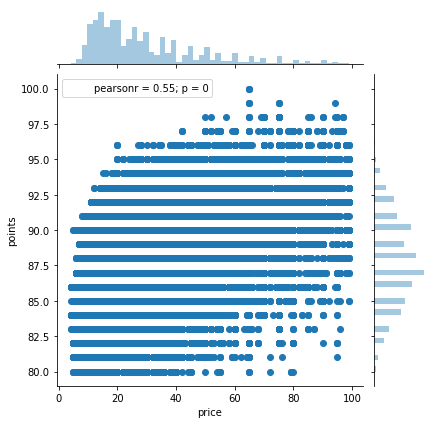

In [10]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

请注意，此图表带有一些花里胡哨的东西：提供相关系数，以及两侧的直方图。 这些复合图是`seaborn`中反复出现的主题。 除此之外，`jointplot`就像`pandas`散点图。

和`pandas`一样，我们可以使用十六进制图（通过简单地传递`kind ='hex'`）来处理过度绘图：

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


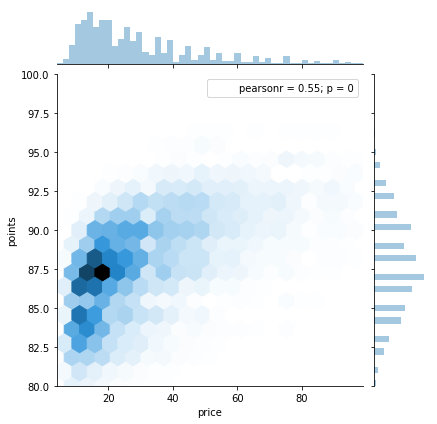

In [11]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)

## Boxplot and violin plot

`seaborn`提供了boxplot功能。 它创建了一个统计上有用的图，如下所示：

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


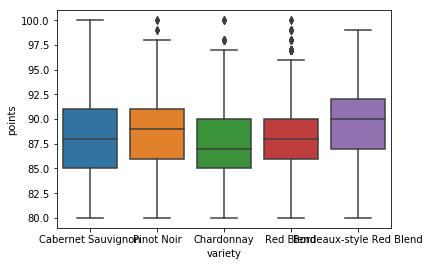

In [12]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)

上面显示的分布中心是boxplot中的“​​框”。盒子的顶部是第75百分位，而底部是第25百分位。换句话说，一半的数据是在盒子内分发的！中间的绿线是中位数。

该图的另一部分，即“胡须”，显示了超出分布中心的点的范围。超出* *的个别圈子是异常值。

这个箱子图向我们展示了虽然所有五种葡萄酒都得到了大致相似的评级，但波尔多风格的葡萄酒的评级往往略高于霞多丽。

箱形图非常适合总结许多数据集的形状。它们在计算方面也没有限制：您可以在绘图中放置尽可能多的框，因为您可以轻松地挤压到页面上。

但是，它们仅适用于具有大量可能值的区间变量和名义变量;他们假设你的数据大致是正态分布的（否则他们的设计没有多大意义）;他们没有提供任何有关个人价值观的信息，只是将整个分配视为一个整体。

在大多数情况下，我发现稍微更高级的“小提琴画”更具视觉诱惑力：

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


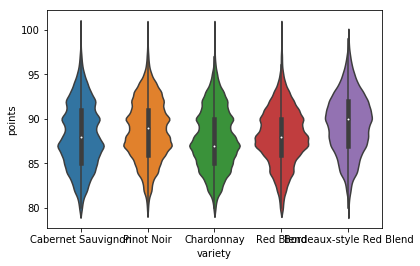

In [14]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)

一个`violinplot`巧妙地用数据的核密度估计替换了boxplot中的框。 它显示了基本相同的数据，但比实用的箱形图更难以曲解并且更加漂亮。

## Why seaborn?

现在已经看到'pandas'策划和“seaborn”库正在运行中，我们现在可以比较两者并决定何时使用哪个为什么。

回想一下我们在本教程中一直使用的数据：

In [15]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


该数据采用“面向记录”的格式。每一行都是一条记录（评论）;总的来说，所有行的列表是所有记录的列表（所有评论）。这是大多数数据的选择格式：与单个可识别单位的“事物”（“记录”）相对应的数据。生成的大多数简单数据都是以这种格式创建的，而非几乎总是可以转换的数据。这被称为“整洁数据”格式。

seaborn设计用于开箱即用的这种数据，适用于所有情节类型，而且操作简便。这使它成为一个非常方便的工作台工具。

pandas不是这样设计的。在pandas中，我们生成的每个图都非常直接地与输入数据相关联。从本质上讲，无论输入是什么，pandas都希望您的数据处于完全正确的输出形状。

因此，在实践中，尽管它简单，但大熊猫绘图工具对于探索性数据分析的初始阶段非常有用，但是一旦您开始进行更复杂的探索，seaborn确实成为您的首选工具。

# Examples

和以前的笔记本一样，让我们现在通过回答一些关于我们在本节中使用的图表的问题来测试自己。 得到答案后，单击下面的“输出”按钮以显示正确答案。

1.`seaborn` `countplot`相当于`pandas`中的内容？  
2.用`kind ='hex'`配置的`seaborn``anigplot`相当于`pandas`中的内容？
3.为什么`kdeplot`对于序数分类数据不能很好地工作？
4.`boxplot`中的“框”代表什么？

1.seaborn countplot就像一只熊猫条形图。  
2.海鸟的关节图就像一只大熊猫六角形图。  
3.KDEPlots通过将数据聚合成平滑曲线来工作。 这对于区间数据非常有用，但对于序数分类数据并不总是有效。  
4.盒子的顶部是第75百分位数。 盒子的底部是第25百分位数。 中位数，即第50百分位数，是框中心的线。 因此，分发中50％的数据都位于包装盒内！

In [17]:
pokemon = pd.read_csv("./input/pokemon.csv", index_col=0)
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
abilities,,,,,,,,,,,,,,,,,,,,,
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,88.1,3,122,120,80,grass,poison,100.0,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


而现在，绘图：

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


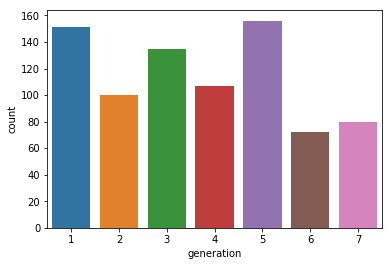

In [19]:
sns.countplot(pokemon['generation'])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


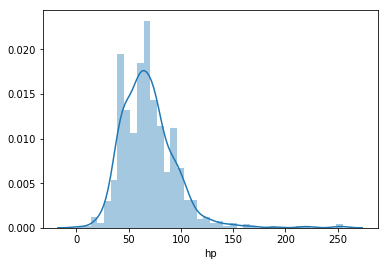

In [21]:
sns.distplot(pokemon['hp'])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


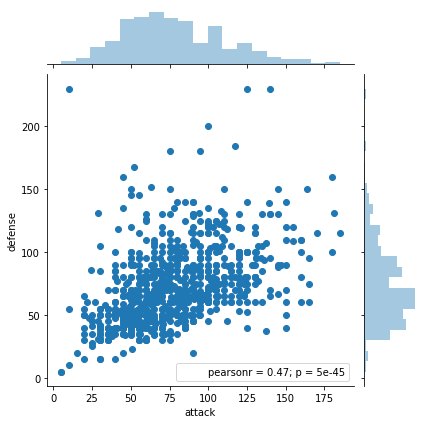

In [22]:
sns.jointplot(x='attack', y='defense', data=pokemon)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


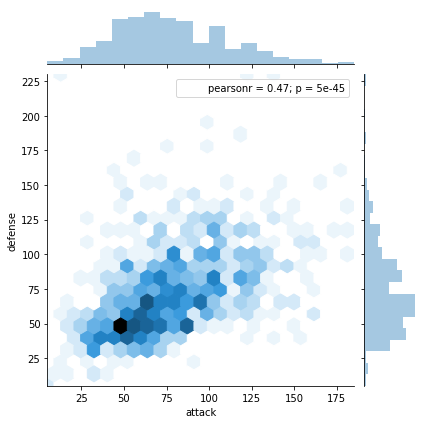

In [23]:
sns.jointplot(x='attack', y='defense', data=pokemon, kind='hex')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


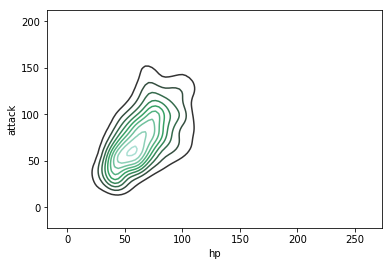

In [24]:
sns.kdeplot(pokemon['hp'], pokemon['attack'])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


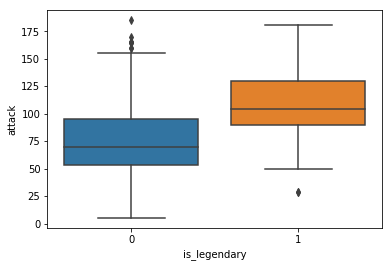

In [26]:
sns.boxplot(x='is_legendary', y='attack', data=pokemon)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


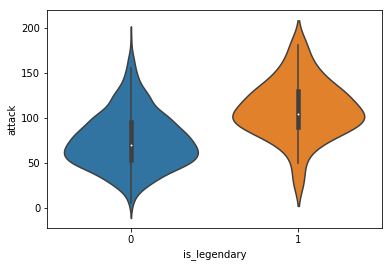

In [27]:
sns.violinplot(x='is_legendary', y='attack', data=pokemon)

## Conclusion

`seaborn`是Python数据生态系统中最重要的，也是最重要的数据可视化工具之一。 在这本笔记本中，我们研究了“seaborn”带来的功能和能力。 您可以使用我们在本教程或本教程其他地方未涉及的库来完成更多工作; 我强烈建议浏览极好的`seaborn` [图库页面](https://seaborn.pydata.org/examples/index.html)，以查看更多美丽的图书馆实例。

[点击此处转到下一节“与seaborn面对面”](https://www.kaggle.com/residentmario/faceting-with-seaborn)。